## 1.	Import the necessary libraries and read the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('fifa.csv')
df1=df.copy()

In [3]:
info=pd.read_csv('fifa_+variable_information.csv')

<!-- 1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis:

Column	Details	Required output
'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
'Contract Valid Until'	Date as a string 	Convert to datetime type
'Height'	In inches with a quotation mark 	Convert to Float with decimal points
'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

4.	Check for missing values and do a mean imputation where necessary.


Exploratory Analysis:

1.	Plot the distribution of Overall rating for all players. 
2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
a)	Are there any players appearing in more than one Table. Please point out such players.
b)	What is the average wage one can expect to pay for the top 5 in every position?
 -->

## 2.	Drop any columns that you deem unecessary for analysis.

In [4]:
df1.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

## 3.	The following columns need to be converted for further analysis:

#####  3.1 'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
#####  3.2 'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.
#####  3.3 'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
#####  3.4 'Contract Valid Until'	Date as a string 	Convert to datetime type
#####  3.5 'Height'	In inches with a quotation mark 	Convert to Float with decimal points
#####  3.6 'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float
#####  3.7 'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.

##### (You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)


### Evaluations:-

#### 3.1 'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.


In [5]:
df1['Value'].isna().sum()

0

In [6]:
df1['Value'] = df1['Value'].str.replace('€','').str.replace('M','000000').str.replace('K','000').str.replace('.','').astype('float64')

#### 3.2 'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.

In [7]:
df1['Wage'].isna().sum()

0

In [8]:
df1['Wage'] = df1['Wage'].str.replace('€','').str.replace('M','000000').str.replace('K','000').str.replace('.','').astype('float64')


#### 3.3 'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year


In [9]:
df1['Joined'].isna().sum()/len(df1['Joined'])*100  # There are 8.53% null values in Joined

8.529686384357664

In [10]:
df1.dropna(subset=['Joined'],inplace=True)                # Dropping Null Values
df1['Joined']=df1['Joined'].str[-4:].astype('int64')

In [11]:
df1['Joined'].isna().sum()

0

#### 3.4 'Contract Valid Until'	Date as a string 	Convert to datetime type

In [12]:
df1['Contract Valid Until'].isna().sum()

0

In [13]:
df1['Contract Valid Until']=pd.to_datetime(df1['Contract Valid Until'])

#### 3.5 'Height'	In inches with a quotation mark 	Convert to Float with decimal points

In [14]:
df1['Height'].isna().sum()

0

In [15]:
df1['Height']=df1['Height'].str.replace("'",".").astype('float64')

#### 3.6 'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float

In [16]:
df1['Weight'].isna().sum()

0

In [17]:
df1['Weight']=df1['Weight'].str.replace('lbs','').astype('float64')

#### 3.7 'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.

In [18]:
df1['Release Clause'].isna().sum()

11

In [19]:
df1.dropna(subset=['Release Clause'],inplace=True)

In [20]:
df1['Release Clause']=df1['Release Clause'].str.replace('€','').str.replace('€','').str.replace('M','000000').str.replace('K','000').str.replace('.','').astype('float64')

### 4. Checking for missing values

In [21]:
df1.columns[df1.isna().any()].tolist()

['Loaned From']

In [22]:
df1['Loaned From'].isna().sum()/len(df1['Loaned From'])*100  #Whole data is null

100.0

In [23]:
df1.drop(['Loaned From'],axis=1,inplace=True)     # dropping Loaned From

In [24]:
df1.columns[df1.isna().any()].tolist()

[]

#### Plot the distribution of Overall rating for all players.

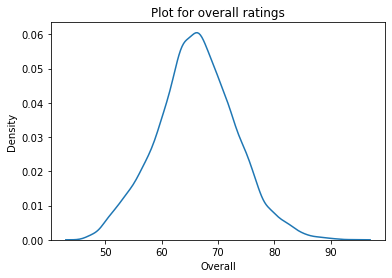

In [25]:
sns.kdeplot(df1['Overall'])
plt.title("Plot for overall ratings")
plt.show()

#### Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

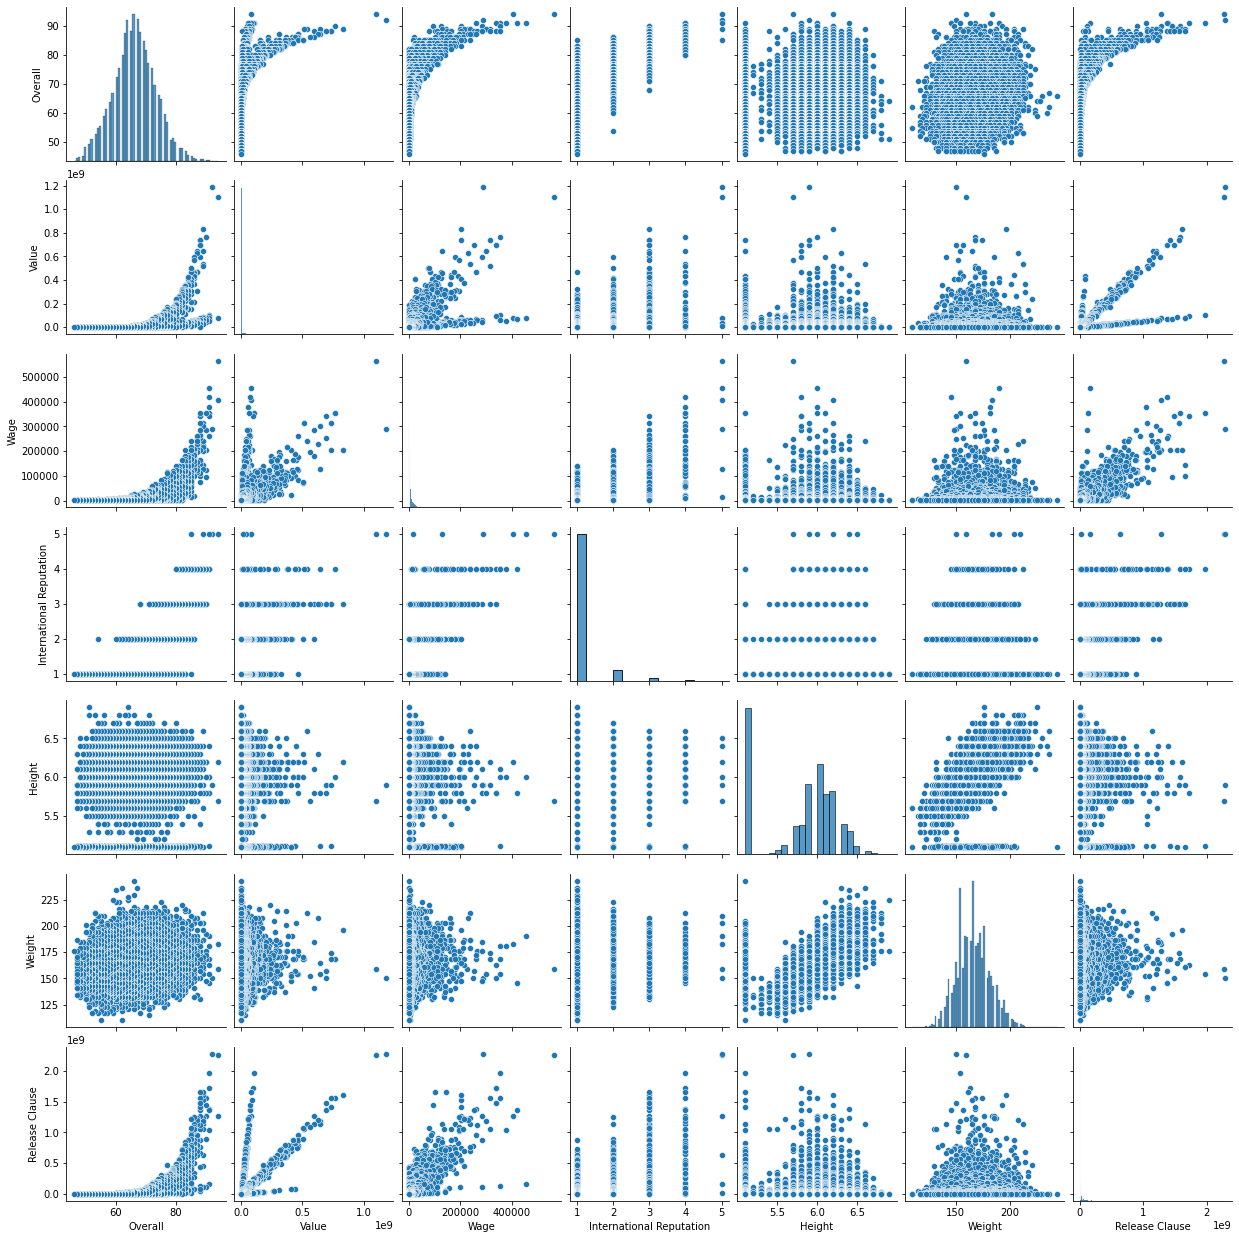

In [26]:
sns.pairplot(df1[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.show()

#### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020. a) What would the average wage for this set of players be? b) What is the average age? c) Is there a correlation between the Overall rating and Value for these players?

#### 3.0 Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [27]:
df3=df1[['Name','Overall','Contract Valid Until','Wage','Value','Age','Position']]

In [28]:
df4=df3[df3['Contract Valid Until']=='2020-01-01'].sort_values('Overall',ascending=False).head(20)
df4

,Name,Overall,Contract Valid Until,Wage,Value,Age,Position
3,De Gea,91,2020-01-01,260000.0,72000000.0,27,GK
6,L. Modrić,91,2020-01-01,420000.0,67000000.0,32,RCM
8,Sergio Ramos,91,2020-01-01,380000.0,51000000.0,32,RCB
5,E. Hazard,91,2020-01-01,340000.0,93000000.0,27,LF
13,David Silva,90,2020-01-01,285000.0,60000000.0,32,LCM
21,E. Cavani,89,2020-01-01,200000.0,60000000.0,31,LS
24,G. Chiellini,89,2020-01-01,215000.0,27000000.0,33,LCB
31,C. Eriksen,88,2020-01-01,205000.0,735000000.0,26,CAM
39,Thiago Silva,88,2020-01-01,165000.0,24000000.0,33,RCB
50,D. Mertens,87,2020-01-01,135000.0,45000000.0,31,RF


 #### 3.1 a) What would the average wage for this set of players be?

In [29]:
df4['Wage'].mean()

205450.0

#### 3.2 b) What is the average age?

In [30]:
df4['Age'].mean()

30.65

#### 3.3 c) Is there a correlation between the Overall rating and Value for these players?

In [31]:
df4[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,-0.077507
Value,-0.077507,1.000000


There is No Correlation between Overall rating and Value

## 4. Generate tables containing the top 5 players by Overall rating for each unique position. a) Are there any players appearing in more than one Table. Please point out such players. b) What is the average wage one can expect to pay for the top 5 in every position?

#### 4.0 Generate tables containing the top 5 players by Overall rating for each unique position. 

In [32]:
df3=df1[['Name','Overall','Contract Valid Until','Wage','Value','Age','Position']]

In [33]:
df3.groupby(['Position']).first().sort_values('Overall',ascending=False)[:5]

,Name,Overall,Contract Valid Until,Wage,Value,Age
Position,,,,,,
ST,Cristiano Ronaldo,94,2022-01-01,405000.0,7.700000e+07,33
RF,L. Messi,94,2021-01-01,565000.0,1.105000e+09,31
LW,Neymar Jr,92,2022-01-01,290000.0,1.185000e+09,26
LF,E. Hazard,91,2020-01-01,340000.0,9.300000e+07,27
RS,L. Suárez,91,2021-01-01,455000.0,8.000000e+07,31


#### 4.1 a) Are there any players appearing in more than one Table. Please point out such players.

In [34]:
df4=df3['Name'].value_counts()
df4[df4>1].count()

670

There are 670 Players appearing more than 1 time

#### 4.2 b) What is the average wage one can expect to pay for the top 5 in every position?

In [35]:
for i in df3['Position'].unique():
    a=df3[df3['Position']==i].sort_values(by ='Overall',ascending=False).head()['Wage'].mean()
    print(f"The Average wage for {i} position: ",a)

The Average wage for RF position:  148000.0
The Average wage for ST position:  294000.0
The Average wage for LW position:  261000.0
The Average wage for GK position:  192800.0
The Average wage for RCM position:  240800.0
The Average wage for LF position:  121200.0
The Average wage for RS position:  130400.0
The Average wage for RCB position:  231000.0
The Average wage for LCM position:  184400.0
The Average wage for CB position:  139600.0
The Average wage for LDM position:  94200.0
The Average wage for CAM position:  174000.0
The Average wage for CDM position:  217000.0
The Average wage for LS position:  92200.0
The Average wage for LCB position:  162000.0
The Average wage for RM position:  131400.0
The Average wage for LM position:  164600.0
The Average wage for LB position:  177200.0
The Average wage for RDM position:  105000.0
The Average wage for RW position:  202000.0
The Average wage for CM position:  130600.0
The Average wage for RB position:  155400.0
The Average wage for RAM p